# GRIP- The sparks Foundation

## Task - 2: Prediction using Unsupervised ML
________________________________

## Author: Nandakishore

### version:

In [1]:
from platform import python_version

print('python version:',python_version())

python version: 3.8.3


# Dataset: IRIS

#### This study, we try to clustering Iris Dataset by using Kmeans clustering
______

### Attribute Information:

![](PQqYGaW.png)

## Import required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loding Dataset

In [3]:
df=pd.read_csv('Iris.csv')

In [4]:
# let's see first & las five rows

df.head().append(df.tail())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.drop('Id',axis=1,inplace = True)

In [10]:
df.duplicated().sum()

3

# EDA

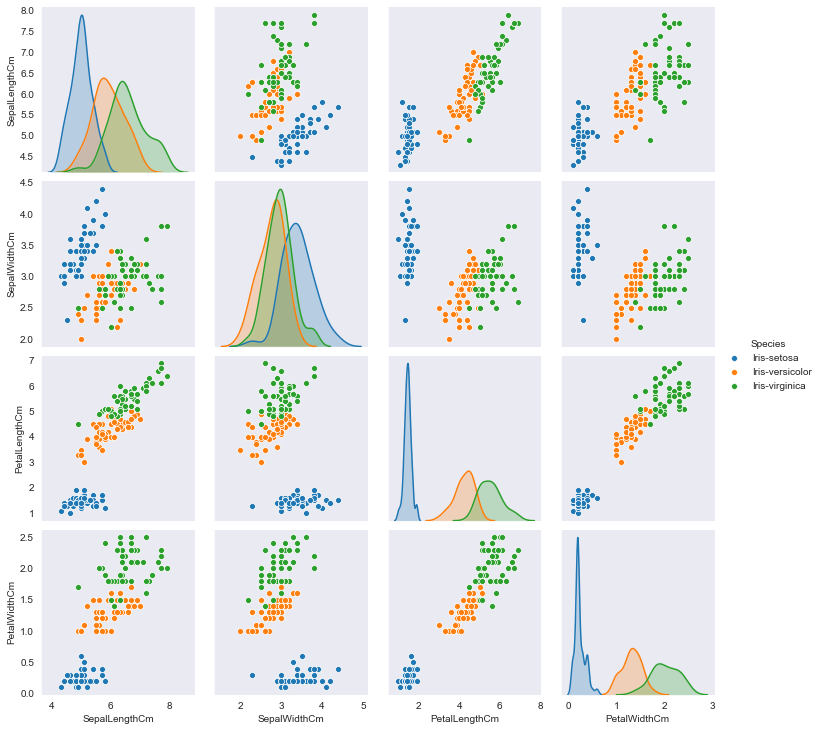

In [11]:
sns.set_style("dark")
sns.pairplot(df,hue='Species')

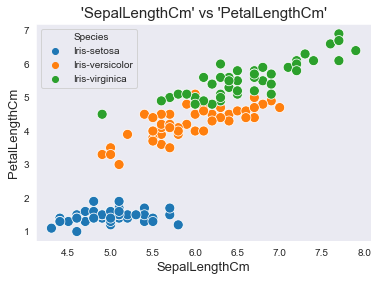

In [12]:
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',s=100,data=df)
plt.title("'SepalLengthCm' vs 'PetalLengthCm'",fontsize=15)
plt.xlabel('SepalLengthCm',fontsize=13)
plt.ylabel('PetalLengthCm',fontsize=13)
plt.show()

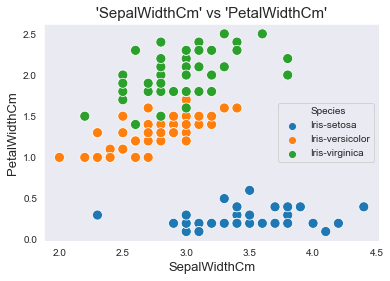

In [13]:
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',s=100,data=df)
plt.title("'SepalWidthCm' vs 'PetalWidthCm'",fontsize=15)
plt.xlabel('SepalWidthCm',fontsize=13)
plt.ylabel('PetalWidthCm',fontsize=13)
plt.show()

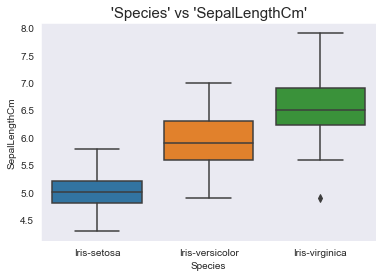

In [14]:
sns.boxplot(x="Species",y='SepalLengthCm',data=df)
plt.title("'Species' vs 'SepalLengthCm'",fontsize=15)
plt.show()

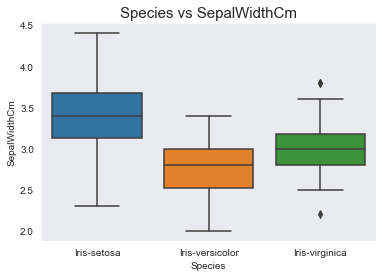

In [15]:
sns.boxplot(x="Species",y='SepalWidthCm',data=df)
plt.title("Species vs SepalWidthCm",fontsize=15)
plt.show()

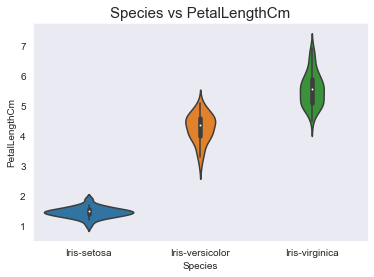

In [16]:
sns.violinplot(x="Species",y='PetalLengthCm',data=df)
plt.title("Species vs PetalLengthCm",fontsize=15)
plt.show()

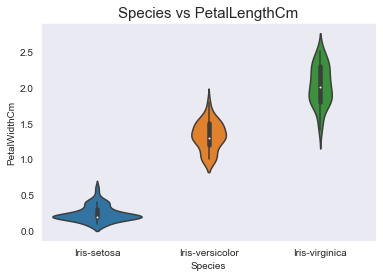

In [17]:
sns.violinplot(x="Species",y='PetalWidthCm',data=df)
plt.title("Species vs PetalLengthCm",fontsize=15)
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['SepalLengthCm']])
df['SSepalLengthCm'] = scaler.transform(df[['SepalLengthCm']])

scaler.fit(df[['SepalWidthCm']])
df['SSepalWidthCm'] = scaler.transform(df[['SepalWidthCm']])

scaler.fit(df[['PetalLengthCm']])
df['SPetalLengthCm'] = scaler.transform(df[['PetalLengthCm']])


scaler.fit(df[['PetalWidthCm']])
df['SPetalWidthCm'] = scaler.transform(df[['PetalWidthCm']])

# Model Bulding

In [19]:
from sklearn.cluster import KMeans

### Finding k value using Elbow Method

In [20]:
wss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SSepalLengthCm', 'SSepalWidthCm', 'SPetalLengthCm',
       'SPetalWidthCm']])
    wss.append(km.inertia_)

optimum clusters:3


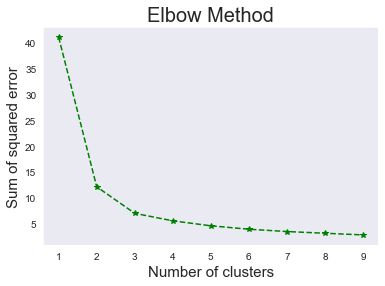

In [21]:
plt.plot(k_rng,wss, 'g--*')
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of squared error',fontsize=15)
plt.title('Elbow Method',fontsize=20)
print('optimum clusters:3')

In [22]:
# converting fro 2D array to 1D array to fit model
x=df.iloc[:,5:].values
x

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### fiting the model & predictinon

In [23]:
km = KMeans(n_clusters=3,init='random', random_state=42,max_iter=400,tol=0.0005,n_init=30)
y_predicted = km.fit_predict(x)
y_predicted


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [24]:
x[y_predicted==0,1]

array([0.625     , 0.41666667, 0.5       , 0.45833333, 0.66666667,
       0.79166667, 0.58333333, 0.58333333, 0.375     , 0.45833333,
       0.70833333, 0.58333333, 0.41666667, 0.41666667, 0.83333333,
       1.        , 0.79166667, 0.625     , 0.75      , 0.75      ,
       0.58333333, 0.70833333, 0.66666667, 0.54166667, 0.58333333,
       0.41666667, 0.58333333, 0.625     , 0.58333333, 0.5       ,
       0.45833333, 0.58333333, 0.875     , 0.91666667, 0.45833333,
       0.5       , 0.625     , 0.45833333, 0.41666667, 0.58333333,
       0.625     , 0.125     , 0.5       , 0.625     , 0.75      ,
       0.41666667, 0.75      , 0.5       , 0.70833333, 0.54166667])

# Centroids

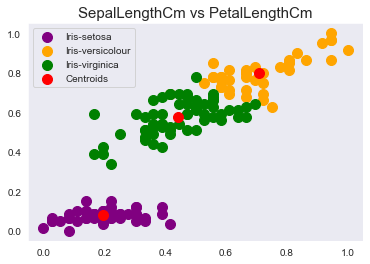

In [25]:
#Visualising the clusters between SepalLengthCm vs PetalLengthCm

plt.scatter(x[y_predicted == 0, 0], x[y_predicted == 0, 2], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_predicted == 1, 0], x[y_predicted == 1, 2], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_predicted == 2, 0], x[y_predicted == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')



#Plotting the centroids of the clusters between SepalLengthCm vs PetalLengthCm

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,2], s = 100, c = 'r', label = 'Centroids')
plt.title('SepalLengthCm vs PetalLengthCm',fontsize=15)
plt.legend()

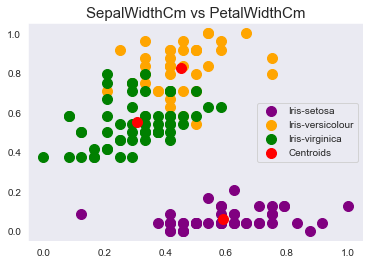

In [26]:
#Visualising the clusters b/w SepalWidthCm vs PetalWidthCm

plt.scatter(x[y_predicted == 0,1], x[y_predicted == 0,3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_predicted == 1,1], x[y_predicted == 1,3], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_predicted == 2,1], x[y_predicted == 2,3], s = 100, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters b/w SepalWidthCm vs PetalWidthCm

plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,3], s = 100, c = 'red', label = 'Centroids')
plt.title('SepalWidthCm vs PetalWidthCm',fontsize=15)
plt.legend()

In [27]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'SSepalLengthCm', 'SSepalWidthCm', 'SPetalLengthCm',
       'SPetalWidthCm'],
      dtype='object')

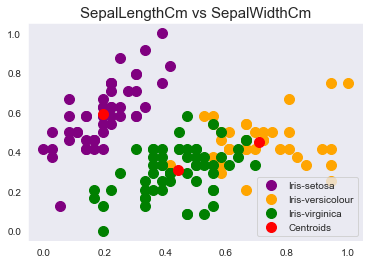

In [28]:
#Visualising the clusters b/w SepalLengthCm vs SepalWidthCm

plt.scatter(x[y_predicted == 0,0], x[y_predicted == 0,1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_predicted == 1,0], x[y_predicted == 1,1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_predicted == 2,0], x[y_predicted == 2,1], s = 100, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters b/w SepalLengthCm vs SepalWidthCm

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.title('SepalLengthCm vs SepalWidthCm',fontsize=15)
plt.legend()

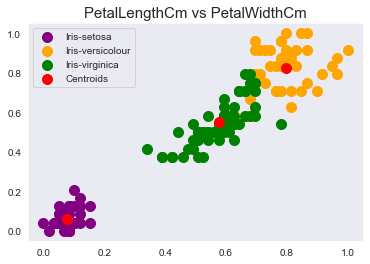

In [29]:
#Visualising the clusters b/w PetalLengthCm vs PetalWidthCm

plt.scatter(x[y_predicted == 0,2], x[y_predicted == 0,3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_predicted == 1,2], x[y_predicted == 1,3], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_predicted == 2,2], x[y_predicted == 2,3], s = 100, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters b/w PetalLengthCm vs PetalWidthCm

plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3], s = 100, c = 'red', label = 'Centroids')
plt.title('PetalLengthCm vs PetalWidthCm',fontsize=15)
plt.legend()

# Homogeneity

In [30]:
from sklearn import metrics
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y=le.fit_transform(df.iloc[:,4])

In [31]:
print('Homogeneity is:',metrics.homogeneity_score(y_predicted,Y))

Homogeneity is: 0.7474865805095324


In [32]:
homogenety=metrics.homogeneity_score(y_predicted,Y)

In [33]:
print("Homogenety: %.2f%%" % ( homogenety* 100.0))

Homogenety: 74.75%


# ACTUAL VS PREDICTED

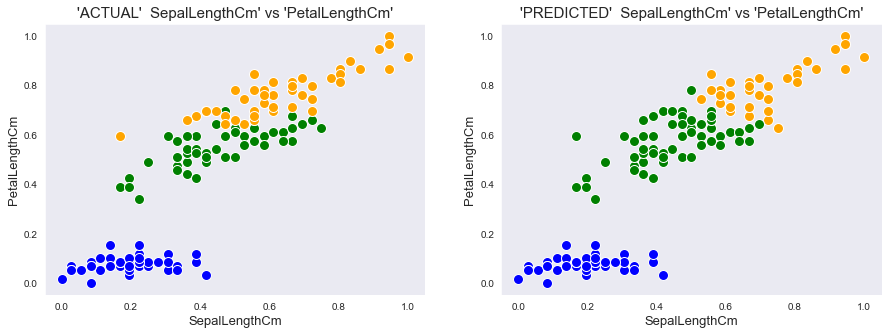

In [34]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax2.scatter(x[y_predicted == 0, 0], x[y_predicted == 0, 2], s = 100, c = 'blue', label = 'Iris-setosa',edgecolor='white')
ax2.scatter(x[y_predicted == 1, 0], x[y_predicted == 1, 2], s = 100, c = 'orange', label = 'Iris-versicolour',edgecolor='white')
ax2.scatter(x[y_predicted == 2, 0], x[y_predicted == 2, 2], s = 100, c = 'green', label = 'Iris-virginica',edgecolor='white')
ax2.set_title("'PREDICTED'  SepalLengthCm' vs 'PetalLengthCm'",fontsize=15)
ax2.set_xlabel('SepalLengthCm',fontsize=13)
ax2.set_ylabel('PetalLengthCm',fontsize=13)


ax1.scatter(x[Y == 0, 0], x[Y == 0, 2], s = 100, c = 'blue', label = 'Iris-setosa',edgecolor='white')
ax1.scatter(x[Y == 1, 0], x[Y == 1, 2], s = 100, c = 'green', label = 'Iris-versicolour',edgecolor='white')
ax1.scatter(x[Y == 2, 0], x[Y == 2, 2], s = 100, c = 'orange', label = 'Iris-virginica',edgecolor='white')
ax1.set_title("'ACTUAL'  SepalLengthCm' vs 'PetalLengthCm'",fontsize=15)
ax1.set_xlabel('SepalLengthCm',fontsize=13)
ax1.set_ylabel('PetalLengthCm',fontsize=13)
plt.show()